# Module 4: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Understand mean intervals and Prediction Intervals through read data applications and visualizations.
2. Observe how CIs and PIs change on different data sets.
3. Observe and analyze interval curvature.
4. Apply understanding of causation to experimental and observational studies.

General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

In [19]:
# This cell loads the necesary libraries for this assignment
library(tidyverse)
library(ggplot2)

## Problem 1: Interpreting Intervals

For this problem, we're going to practice creating and interpreting Confidence (Mean) Intervals and Prediction Intervals. To do so, we're going to use data in U.S. State Wine Consumption (millions of liters) and Population (millions).

#### 1. (a) Initial Inspections

Load in the data and create a scatterplot with `population` on the x-axis and `totWine` on the y-axis. For fun, set the color of the point to be `#CFB87C`.

,State,pcWine,pop,totWine
,<fct>,<dbl>,<dbl>,<dbl>
1,Alabama,6.0,4.829479,28.976874
2,Alaska,10.9,0.736879,8.031981
3,Arizona,9.7,6.624617,64.258785
4,Arkansas,4.2,2.958663,12.426385
5,California,14.0,38.335203,536.692842
6,Colorado,8.7,5.267603,45.828146


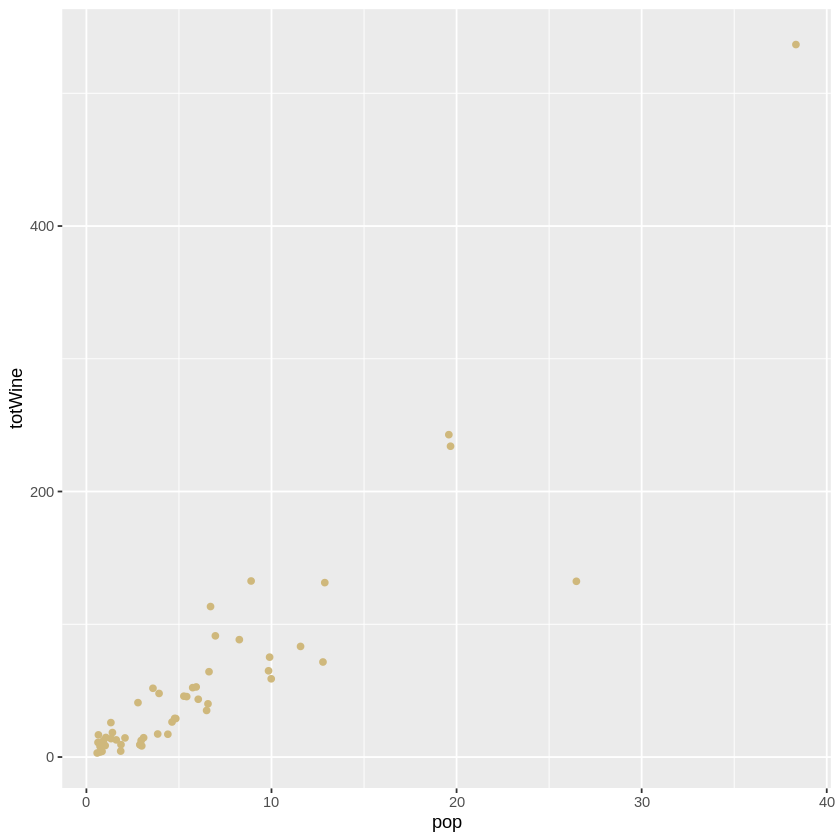

In [20]:
# Load the data
wine.data = read.csv("wine_state_2013.csv")
head(wine.data)
# Your Code Here
ggplot(wine.data, aes(x = pop, y = totWine)) + 
    geom_point(color = "#CFB87C")

#### 1. (b) Confidence Intervals

Fit a linear regression with `totWine` as the response and `pop` as the predictor. Add the regression line to your scatterplot. For fun, set its color to gold with `col=#CFB87C`. Add the $90\%$ Confidence Interval for the regression line to the plot.

Then choose a single point-value population and display the upper and lower values for the Confidence Interval at that point. In words, explain what this interval means for that data point.

Warning message in predict.lm(lmod, interval = "prediction", level = 0.9):
“predictions on current data refer to _future_ responses
”
`geom_smooth()` using formula 'y ~ x'



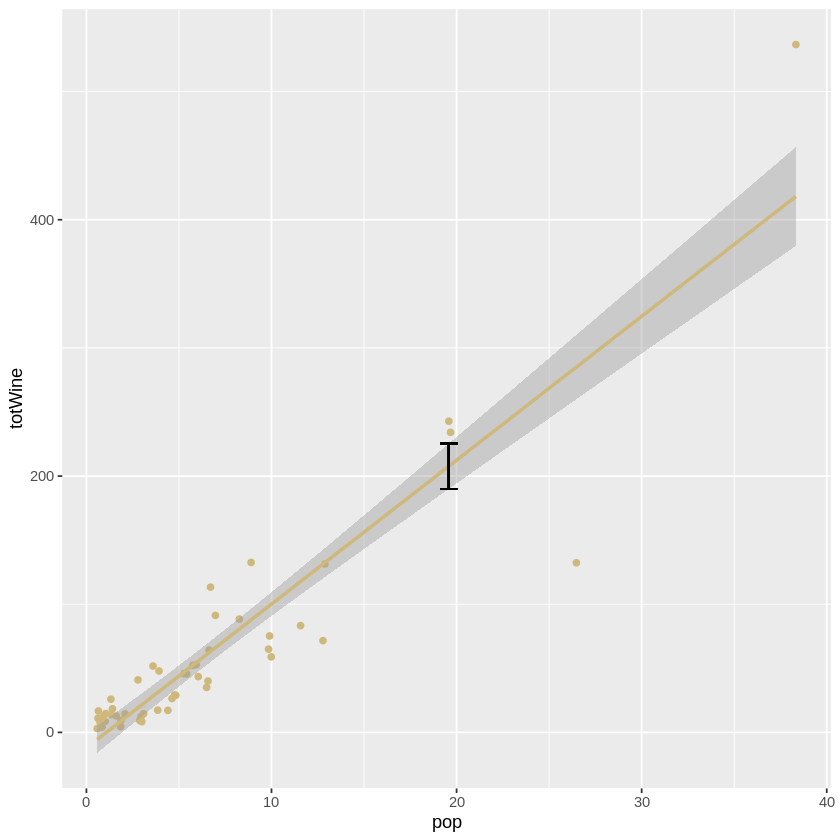

In [21]:
# Your Code Here
lmod = lm(totWine~pop, data = wine.data)

cnf = predict(lmod, interval = "confidence", level = 0.90)
prd = predict(lmod, interval = "prediction", level = 0.90)
new_df = cbind(wine.data,prd, cnf)
FL_pop = new_df[10,3]
FL_clow = new_df[10,9]
FL_chigh = new_df[10,10]

ggplot(wine.data, aes(x = pop, y = totWine)) + 
    geom_point(color="#CFB87C")+
    #geom_line(aes(y=lwr), color = "red", linetype = "dashed")+
    #geom_line(aes(y=upr), color = "red", linetype = "dashed")+
    #geom_smooth(method = lm, se = TRUE, color = "#CFB87C")
    geom_smooth(method = lm, level=0.90, color = "#CFB87C")+
    geom_errorbar(aes(x=FL_pop, ymin = FL_clow, ymax = FL_chigh))

For this point, the confidence interval means that if the sample was drawn from the same population multiple times, we should expect 90% of the confidence intervals should contain the true population mean.

#### 1. (c) Prediction Intervals

Using the same `pop` point-value as in **1.b**, plot the prediction interval end points. In words, explain what this interval means for that data point.

`geom_smooth()` using formula 'y ~ x'



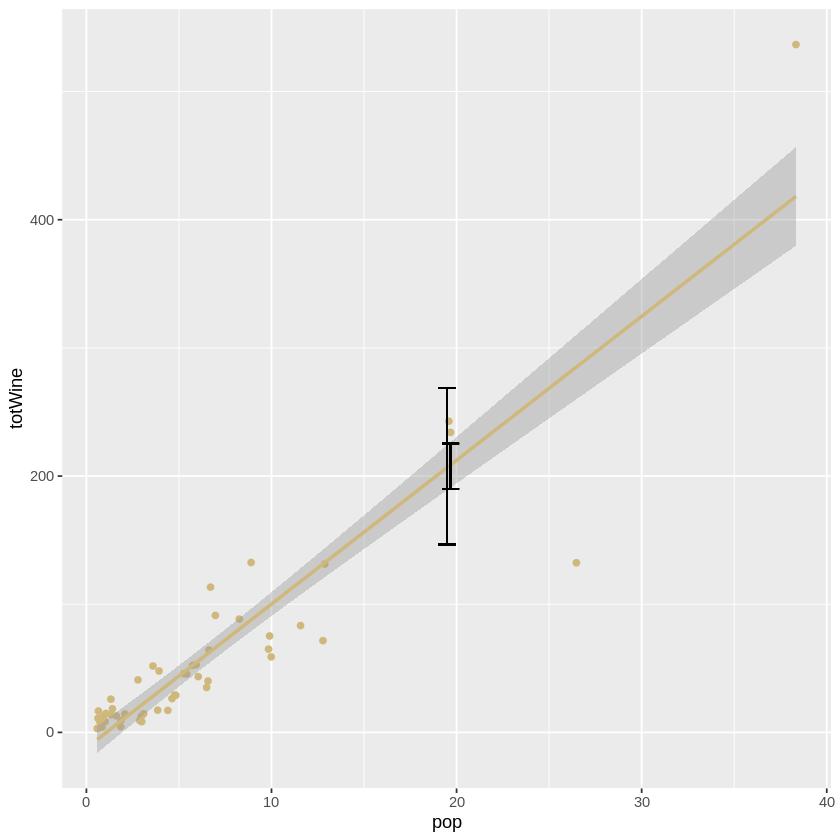

In [22]:
# Your Code Here
FL_plow = new_df[10,6]
FL_phigh = new_df[10,7]

ggplot(wine.data, aes(x = pop, y = totWine)) + 
    geom_point(color="#CFB87C")+
    #geom_line(aes(y=lwr), color = "red", linetype = "dashed")+
    #geom_line(aes(y=upr), color = "red", linetype = "dashed")+
    #geom_smooth(method = lm, se = TRUE, color = "#CFB87C")
    geom_smooth(method = lm, level=0.90, color = "#CFB87C")+
    geom_errorbar(aes(x=FL_pop+.1, ymin = FL_clow, ymax = FL_chigh)) +
    geom_errorbar(aes(x=FL_pop-.1, ymin = FL_plow, ymax = FL_phigh))

At the same population, the 90% prediction interval is between this range or we would predict the total wine consumption to fall within this range.

#### 1. (d) Some "Consequences" of Linear Regression

As you've probably gathered by now, there is a lot of math that goes into fitting linear models. It's important that you're exposed to these underlying systems and build an intuition for how certain processes work. However, some of the math can be a bit too... tedious for us to make you go through on your own. Below are a list of "consequences" of linear regression, things that are mathematically true because of the assumptions and formulations of the linear model (let $\widehat\varepsilon_i$ be the residuals of the regression model):

1. $\sum \widehat\varepsilon_i = 0$ : The sum of residuals is 0.
2. $\sum \widehat\varepsilon_i^2$ is as small as it can be.
3. $\sum x_i \widehat\varepsilon_i = 0$
4. $\sum \hat{y}_i \widehat\varepsilon_i = 0$ : The Residuals are orthogonal to the fitted values.
5. The Regression Line always goes through $(\bar{x}, \bar{y})$.

Check that your regression model confirms the "consequences" $1,3,4$ and $5$. For consequence $2$, give a logical reason on why this formulation makes sense.

**Note: even if your data agrees with these claims, that does not prove them as fact. For best practice, try to prove these facts yourself!**

[1] 0

[1] 59325.93

[1] 0

[1] 0

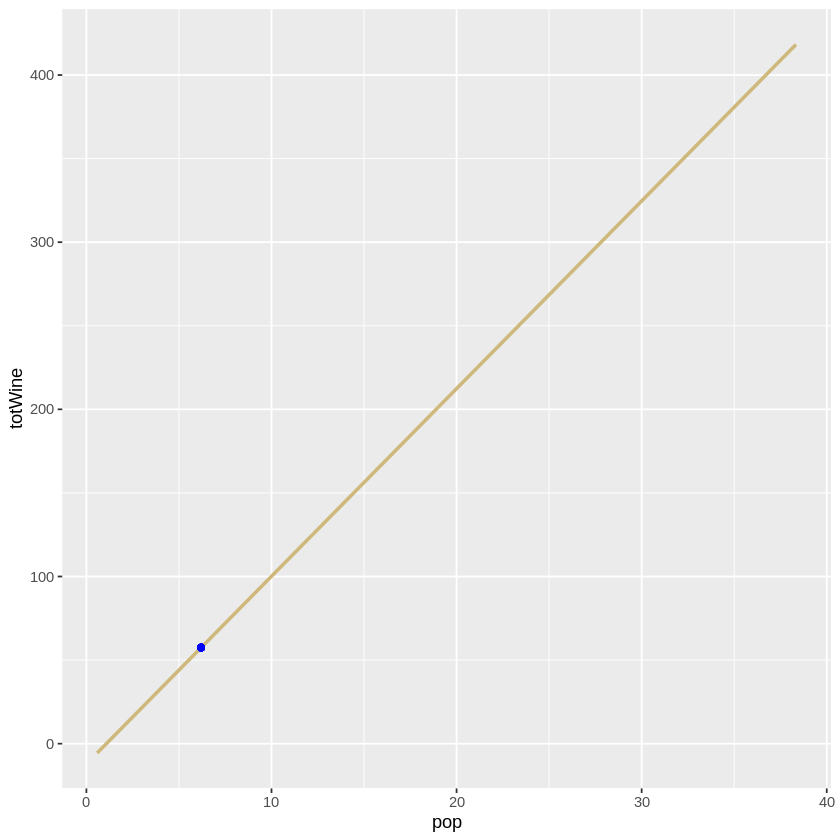

In [23]:
# Your Code Here
#Consequence #1:
round(sum(lmod$residuals),2)

#Consequence #2: 
round(sum(lmod$residuals^2),2)
#  this number is as small as possible because the sum of residuals of the linear model is 0.

#Consequence #3:
round(sum(wine.data$pop*lmod$residuals),2)

#Consequence #4:
fitted_vals = predict(lmod,new=wine.data,interval='prediction')[,'fit']
round(sum(fitted_vals*lmod$residuals),2)

#Consequence #5:
#As you can see in the chart below, putting in the mean population for x and mean wine consumption for y, 
#the point fits right on the line.
ggplot(wine.data,aes(pop,totWine)) +
    geom_smooth(formula=y~x,method=lm, se=FALSE, col="#CFB87C") + 
    geom_point(x=mean(wine.data$pop),y=mean(wine.data$totWine),col="blue")

For consequence 2, this formulation makes sense because the least squares estimate is needed to find the best fit line.  Beta-hat is an unbiased estimator of Beta so therefore I have the lowest variance and as a result $\sum \widehat\varepsilon_i^2$ is as small as it can be.

# Problem 2: Explanation

<img src="xkcd_correlation.png" style="width:600px;"/>

Image Source: https://xkcd.com/552/

Did our wine drinking data come from an experiment or an observational study? Do you think we can infer causation between population and the amount of wine drank from these data?

The data came from an observational study.
There is a correlation and I can see with a greater population, that could lead to greater wine consumption but I can't say there is causality. For instance, there could be other variables correlated with population that is the actual cause of the wine consumption.

# Problem 3: Even More Intervals!

We're almost done! There is just a few more details about Confidence Intervals and Perdiction Intervals which we want to go over. How does changing the data affect the confidence interval? That's a hard question to answer with a single dataset, so let's simulate a bunch of different datasets and see what they intervals they produce.

#### 3. (a) Visualize the data

The code cell below generates 20 data points from two different normal distributions. Finish the code by fitting a linear model to the data and plotting the results with ggplot, with Confidence Intervals for the mean and Prediction Intervals included. 

Experiment with different means and variances. Does changing these values affect the CI or PI?

In [24]:
gen_data <- function(mu1, mu2, var1, var2){
    # Function to generate 20 data points from 2 different normal distributions.
    x.1 = rnorm(10, mu1, 2)
    x.2 = rnorm(10, mu2, 2)
    y.1 = 2 + 2*x.1 + rnorm(10, 0, var1)
    y.2 = 2 + 2*x.2 + rnorm(10, 0, var2)

    df = data.frame(x=c(x.1, x.2), y=c(y.1, y.2))
    return(df)
}

set.seed(0)
head(gen_data(-8, 8, 10, 10))

,x,y
,<dbl>,<dbl>
1,-5.474091,-11.1908617
2,-8.652467,-11.5309770
3,-5.340401,-7.3474393
4,-5.455141,-0.8683876
5,-7.170717,-12.9125020
6,-11.079900,-15.1237204


Warning message in predict.lm(lm_ex1, interval = "prediction"):
“predictions on current data refer to _future_ responses
”


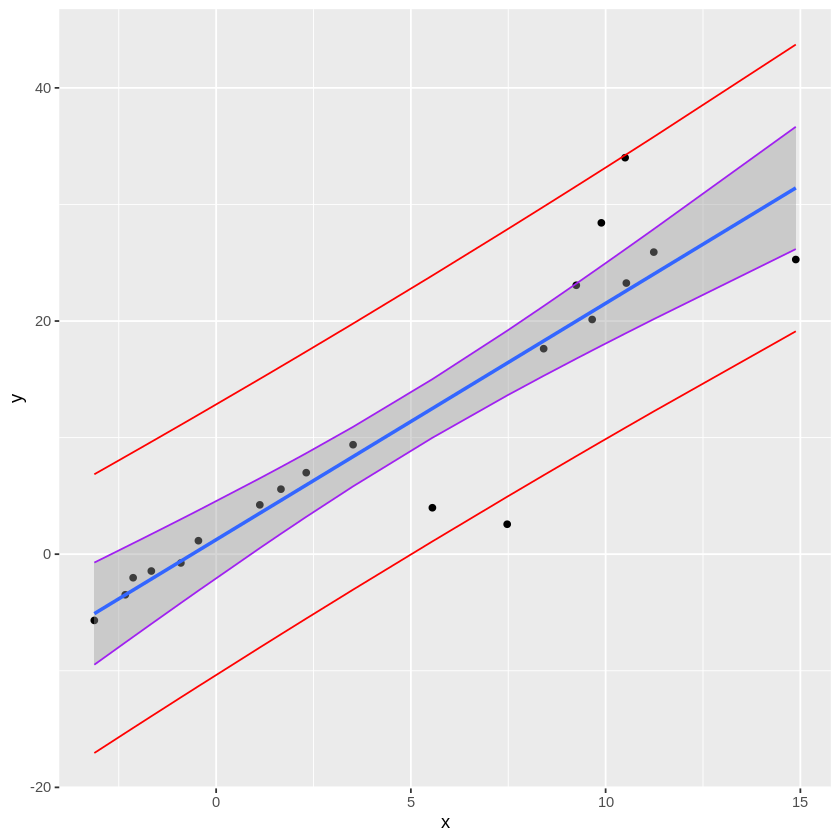

In [25]:
# Example 1
data_ex1 = gen_data(0, 10, 1, 10)
lm_ex1 = lm(formula=y~x,data=data_ex1)

mean_x1 = predict(lm_ex1, interval="confidence")
mean_x2 = predict(lm_ex1, interval="prediction")

# pred = predict(lm_3,interval='prediction')

plot_ex1 = ggplot(data_ex1,aes(x=x,y=y)) + 
    geom_point() +
    geom_smooth(formula=y~x,method=lm, se=TRUE) + 
    geom_line(aes(y=mean_x1[,'lwr']),col="purple") + 
    geom_line(aes(y=mean_x1[,'upr']),col="purple") + 
    geom_line(aes(y=mean_x2[,'lwr']),col="red") + 
    geom_line(aes(y=mean_x2[,'upr']),col="red")

plot_ex1

Warning message in predict.lm(lm_ex2, interval = "prediction"):
“predictions on current data refer to _future_ responses
”


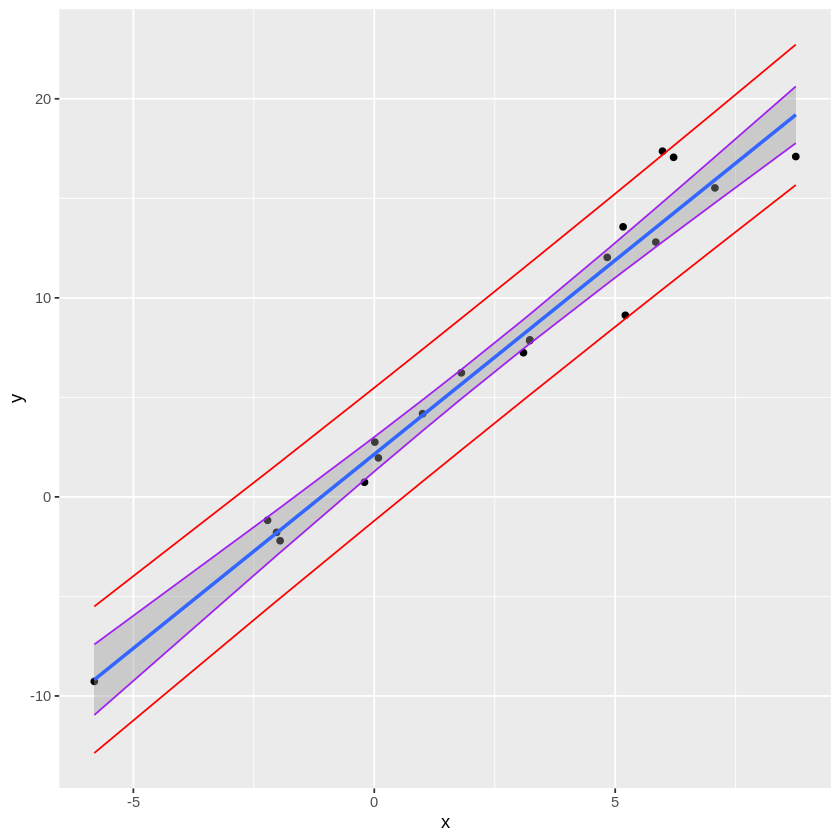

In [35]:
# Example 2
data_ex2 = gen_data(0, 5, .5, 2)
lm_ex2 = lm(formula=y~x,data=data_ex2)

mean_x1 = predict(lm_ex2, interval="confidence")
mean_x2 = predict(lm_ex2, interval="prediction")

# pred = predict(lm_3,interval='prediction')

plot_ex2 = ggplot(data_ex2,aes(x=x,y=y)) + 
    geom_point() +
    geom_smooth(formula=y~x,method=lm, se=TRUE) + 
    geom_line(aes(y=mean_x1[,'lwr']),col="purple") + 
    geom_line(aes(y=mean_x1[,'upr']),col="purple") + 
    geom_line(aes(y=mean_x2[,'lwr']),col="red") + 
    geom_line(aes(y=mean_x2[,'upr']),col="red")

plot_ex2

When I decrease the variance, the area between the lines gets smaller and of course, when I change the mean the x axis changes.

#### 3. (b) The Smallest Interval

Recall that the Confidence (Mean) Interval, when the predictor value is $x_k$, is defined as:

$$
\hat{y}_h \pm t_{\alpha/2,n-2} \sqrt{MSE \times \Big( \dfrac{1}{n} + \dfrac{(x_k - \bar{x})^2}{\sum(x_i - \bar{x})} \Big)}
$$

where $\hat{y}_h$ is the fitted response for predictor value $x_h$, $t_{\alpha/2,n-2}$ is the t-value with $n-2$ degrees of freedom and $MSE \times \Big( \dfrac{1}{n} + \dfrac{(x_h - \bar{x})^2}{\sum(x_i - \bar{x})} \Big)$ is the standard error of the fit.

From the above equation, what value of $x_k$ would result in the CI with the shortest width? Does this match up with the simulated data? Can you give an intuitive reason for why this occurs?

x
<dbl>
4.768796


,fit,lwr,upr
1,10.91114,8.424035,13.39824


`geom_smooth()` using formula 'y ~ x'



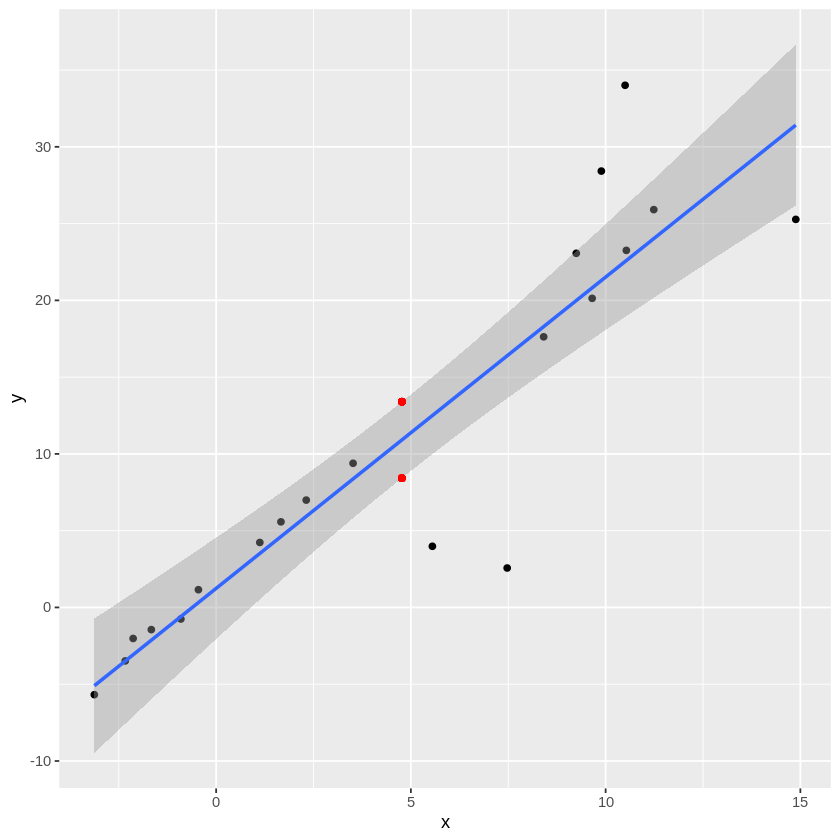

In [36]:
# Your Code Here
data_point = data.frame(x=mean(data_ex1$x))
data_point
predict(lm_ex1, data_point, interval = "confidence")
ggplot(data_ex1, aes(x,y))+
    geom_point()+
    geom_smooth(method=lm, se=T)+
    geom_point(aes(x=4.768796, y = 8.424035), colour = "red")+
    geom_point(aes(x=4.768796, y = 13.39824), colour = "red")


Yes.  Looking at chart above x_bar, 4.768796 gives the CI with the shortest width.  This makes sense because to make the standard error the smallest, we would want (Xk-x_bar) to be 0. 

#### 3. (c) Interviewing the Intervals

Recall that the Prediction Interval, when the predictor value is $x_k$, is defined as:

$$
\hat{y}_h \pm t_{\alpha/2,n-2} \sqrt{MSE \Big( 1 + \dfrac{1}{n} + \dfrac{(x_k - \bar{x})^2}{\sum(x_i - \bar{x})} \Big)}
$$

Does the "width" of the Prediction Interval change at different population values? Explain why or why not.

Yes.  The width of the prediction interval changes at different population values.  The population is 'n' and you will find that both inside and outside of the square root above.  The confidence interval increases as the predictor values moves further from the mean.

## Problem 4: Causality

**Please answer the following three questions. Each answer should be clearly labeled, and a few sentences to a paragraph long.**

1. In your own words, describe the fundamental problem of causal inference. How is this problem related to the counterfactual definition of causality?


2. Describe the use of "close substitutes" as a solution to the fundamental problem of causal inference. How does this solve the problem?


3. What is the difference between a *deterministic* theory of causality and a *probabilistic* theory of causality?

1. The fundamental problem of causal inference is that we don't observe both potential outcomes.  We only observe 1.  This is a missing data problem because for each unit, at most, one of the potential outcomes is observed and the rest are missing.  In the definition of causality, a causal factor is a necessary factor without which the outcome would not have occurred.  The counterfactual definition of causality is trying to measure if the response would change in the absence of its predictor.

2. An example of this would be measuring the amount of sleep after drinking tea one evening and milk another evening.  You can look for both potential outcomes.  However, it would be advised to try and do this study on the same day of the week.  The substitute separates the 1 predictor variable, solving the fundamental problem of causal inference.

3. One view of causation is deterministic: A causes B means that whenever A occurs, B occurs. An alternative view is that causation is probabilistic: the assertion means that given A, the probability of B is greater than some criterion, such as the probability of B given not-A.

## Problem 5: Causal inference and ethics

How we think about causality, and the statistical models that we use to learn about causal relationships, have ethical implications. The goal of this problem is to invite you to think through some of those issues and implications.

Statisticians, data scientists, researchers, etc., are not in agreement on the best ways to study and analyze important social problems, such as racial discrimination in the criminal justice system. Lily Hu, a PhD candidate in applied math and philosophy at Harvard, [wrote](https://lpeproject.org/blog/law-liberation-and-causal-inference/) that disagreements about how to best study these problems "well illustrate how the nuts and bolts of causal inference...about the quantitative ventures to compute 'effects of race'...feature a slurry of theoretical, empirical, and normative reasoning that is often displaced into debates about purely technical matters in methodology."

Here are some resources that enter into or comment on this debate:

1. [Statistical controversy on estimating racial bias in the criminal justice system](https://statmodeling.stat.columbia.edu/2020/07/06/statistical-controversy-on-racial-bias-in-the-criminal-justice-system/)

2. [Can Racial Bias in Policing Be Credibly Estimated Using Data Contaminated by Post-Treatment Selection?](https://dcknox.github.io/files/KnoxLoweMummolo_PostTreatmentSelectionPolicing.pdf)

3. [A Causal Framework for Observational Studies of Discrimination](https://5harad.com/papers/post-treatment-bias.pdf)

**Please read Lily Hu's [blog post](https://lpeproject.org/blog/law-liberation-and-causal-inference/) and Andrew Gelman's blog post ["Statistical controversy on estimating racial bias in the criminal justice system"](https://statmodeling.stat.columbia.edu/2020/07/06/statistical-controversy-on-racial-bias-in-the-criminal-justice-system/) (and feel free to continue on with the other two papers!) to familiarize yourself with some of the issues in this debate. Then, write a short essay (300-500 words) summarizing this debate. Some important items to consider:**

1. How does the "fundamental problem of causal inference" play out in these discussions?


2. What are some "possible distortionary effect[s] of using arrest data from administrative police records to measure causal effects of race"?


3. What role do assumptions (both statistical and otherwise) play in this debate? To what extent are assumptions made by different researchers falsifiable?



Mr. Gelman says, ‘From both papers I draw the same substantive conclusion, which is it that simple, or even not-so-simple regressions of outcome on race and pre-treatment predictors can give misleading results if you’re trying to understand the possibility of racial discrimination in the criminal justice system without thinking carefully about these issues.’
Ms. Hu argues, ‘Statistical methods can never be sources of normative innovation. Instead, we should think their role to be to fill in a more detailed portrait of the social world, given some substantive (qualitative, interpretive) starting sketch.’
They both seem to agree that ‘whether a police encounter becomes violent is independent of race of the stopped individual once we take account of all the information written up in police records’ is FALSE.  Ms. Hu seems to be saying that race is a cause inference for arrests.  Mr. Gelman seems to be saying that you need to make strong assumptions before making causal inference.

Some “possible distortionary effects of using arrest data from administrative police records to measure causal effects of race” include: not taking into account the neighborhood, are the procedures upstream racially biased (e.g. Mayor Giuliani’s ‘stop and frisk’).  As mentioned in the Wall Street Journal, ‘Stop and Frisk Was Not New York’s Silver Bullet Crime Fell for six years after Mayor de Blasio ended the practice’.

As mentioned, Mr. Gelman believes in strong assumptions.  He says that one assumption could be on neighborhood.
Ms. Hu states that there is fault with the notion, ‘progress in statistics is made possible only by the heavy hand of assumption: the more, the better for “causal” inference’.  The assumptions that she mentions are problems are: “how policing might interact with race” and “race figures only in a decision to stop an individual” and police suspicions are based on race.  She says that these are just assumptions.  I believe she is saying that these are not strong enough assumptions.
